In [8]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
import itertools
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
import optuna

In [47]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [48]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [12]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [14]:
train.shape

(25192, 42)

In [15]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [16]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

<Axes: xlabel='class', ylabel='count'>

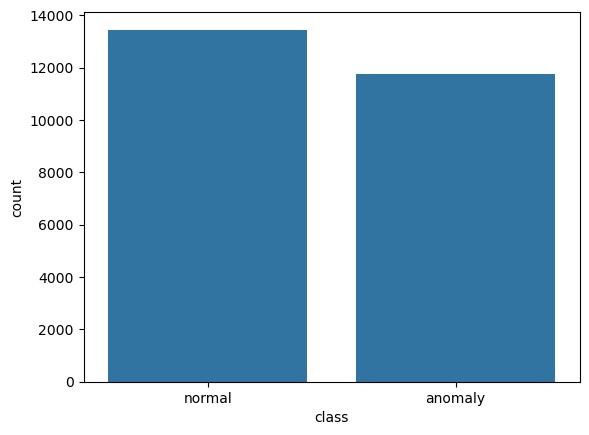

In [17]:
sns.countplot(x=train['class'])

In [18]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [19]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [20]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [21]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [22]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate']

In [23]:
X_train = X_train[selected_features]

In [24]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [26]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9314959736871952
Test Score: 0.9252447737496692


Logistic Regression Accuracy: 0.9252447737496692
precision: 0.9132182549065974 recall: 0.951231527093596 f1_1: 0.9318373748341175


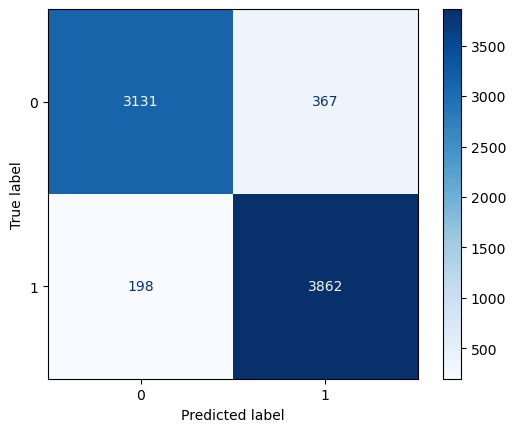

In [27]:
modellr = LogisticRegression()
modellr.fit(x_train, y_train)
y_pred = modellr.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print("precision:", precision1, "recall:", recall1, "f1_1:", f1_1)

In [28]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

gnb_train, gnb_test = gnb_model.score(x_train , y_train), gnb_model.score(x_test , y_test)

print(f"Training Score: {gnb_train}")
print(f"Test Score: {gnb_test}")

Training Score: 0.8907791765906771
Test Score: 0.8855517332627679


Naive Bayes Accuracy: 0.8855517332627679
precision: 0.8683421720083007 recall: 0.9275862068965517 f1_1: 0.8969870191735143


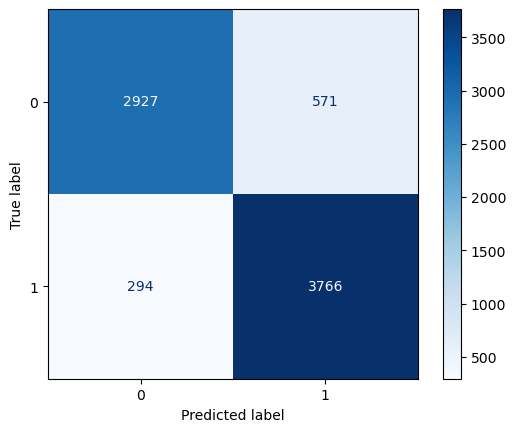

In [29]:
modelgnb = GaussianNB()
modelgnb.fit(x_train, y_train)
y_pred = modelgnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print("precision:", precision1, "recall:", recall1, "f1_1:", f1_1)


In [30]:
svc_model = SVC(random_state = 42)
svc_model.fit(x_train, y_train)

svc_train, svc_test = svc_model.score(x_train , y_train), svc_model.score(x_test , y_test)

print(f"Training Score: {svc_train}")
print(f"Test Score: {svc_test}")

Training Score: 0.9656345695814903
Test Score: 0.9663932257210902


SVM Accuracy: 0.9663932257210902
precision: 0.9609980620155039 recall: 0.9770935960591133 f1_1: 0.9689789936492428


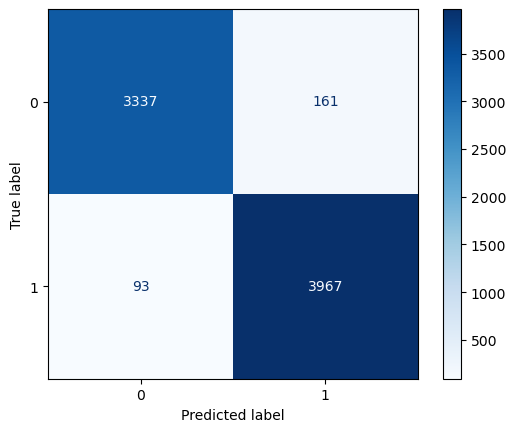

In [31]:
modelsvc = SVC(probability=True)
modelsvc.fit(x_train, y_train)
y_pred = modelsvc.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
print("precision:", precision1, "recall:", recall1, "f1_1:", f1_1)

In [32]:
y_prob1 = modellr.predict_proba(x_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
auc1 = roc_auc_score(y_test, y_prob1)

y_prob2 = modelgnb.predict_proba(x_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
auc2 = roc_auc_score(y_test, y_prob2)

y_prob3 = modelsvc.predict_proba(x_test)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, y_prob3)
auc3 = roc_auc_score(y_test, y_prob3)

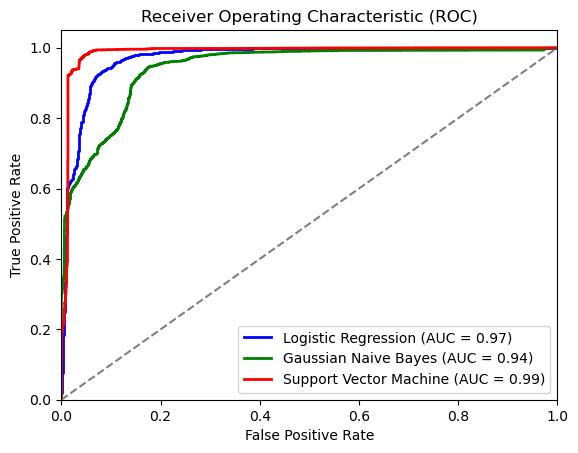

In [33]:
plt.figure()

plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Gaussian Naive Bayes (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'Support Vector Machine (AUC = {auc3:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


<Axes: >

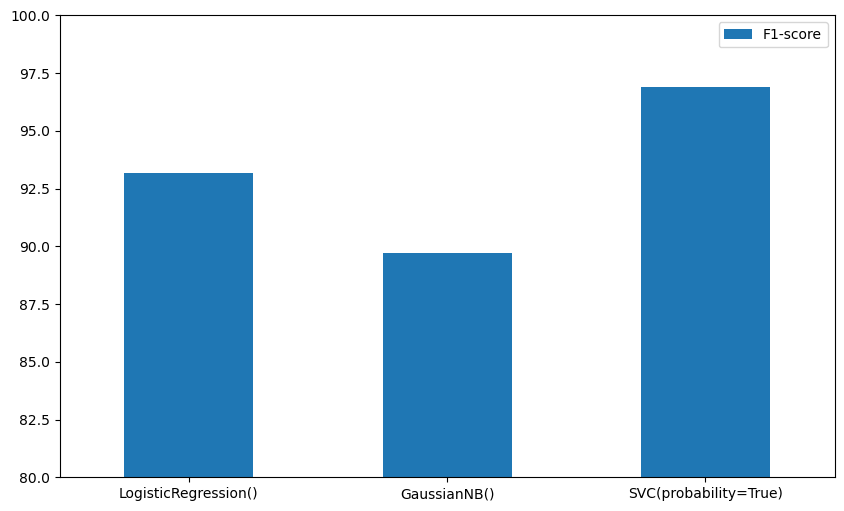

In [34]:
f1s = {}
models=[modellr,modelgnb, modelsvc]
preds=[modellr.predict(x_test),modelgnb.predict(x_test),modelsvc.predict(x_test)]
x=0
for name in models:
    f1s[name]=f1_score(y_test, preds[x])
    x+=1
    
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

In [36]:
model = {}
model['LogisticRegression']= modellr
model['GaussianNaiveBayes']= modelgnb
model['SupportVectorMachine']= modelsvc

C:\Users\Sambhat\AppData\Local\Temp\ipykernel_21164\1136498948.py:17: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  scores=pd.DataFrame(scores).swapaxes("index", "columns")*100


<Axes: >

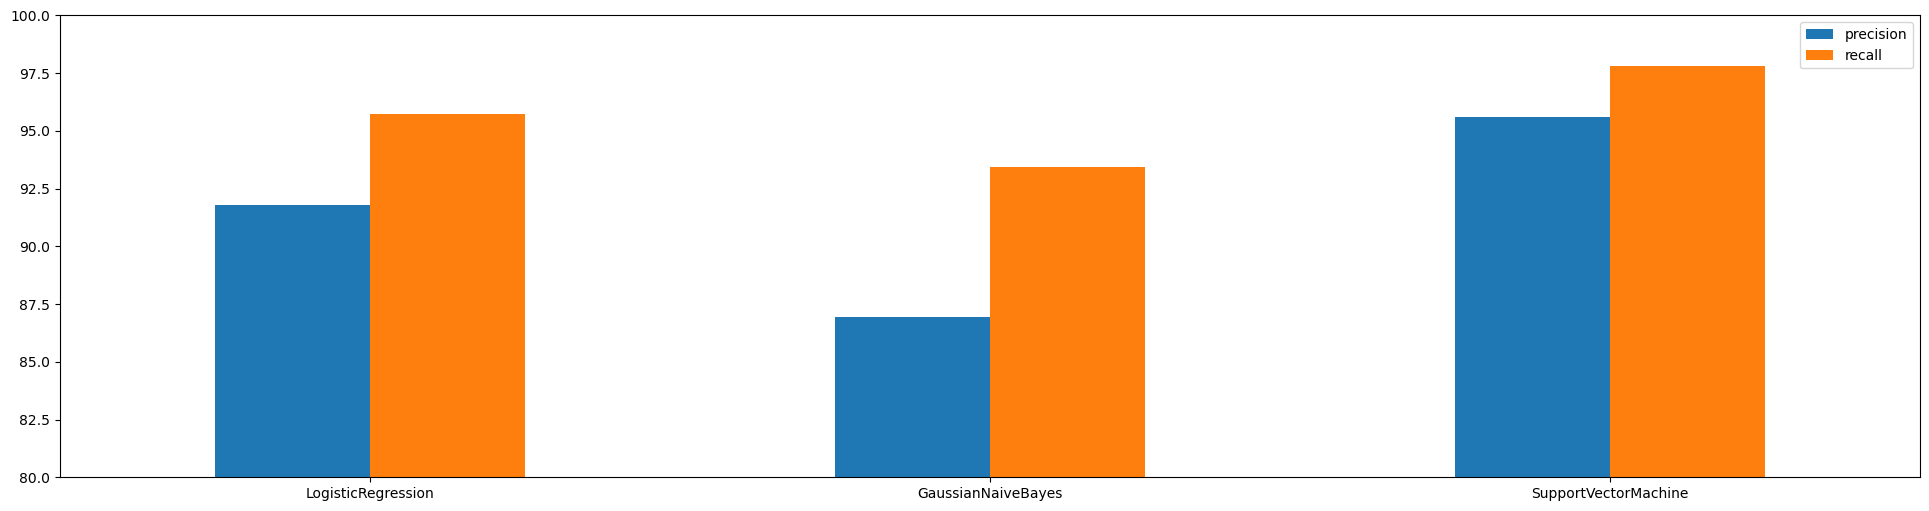

In [37]:
scores = {}
for name in model:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(model[name], x_train, y_train, cv=10, scoring=scorer)
for name in model:
  

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    
for name in model:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()

scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [38]:
base_learners = [
    ('log_reg', modellr),
    ('svc', modelsvc),
    ('nb', modelgnb)
]

# Train the model
meta_clf = LogisticRegression()

# Define stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_clf)

# Train the model
stacking_clf.fit(x_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Stacking Classifier Accuracy:', accuracy)

Stacking Classifier Accuracy: 0.9642762635617889


In [39]:
# If not already installed
# !pip install cryptography

from cryptoagile_nids import CryptoAgilityEngine, default_key_manager
from sklearn.metrics import roc_auc_score
import json, time


In [40]:
km = default_key_manager()          # in-memory keys (swap to KMS/HSM in prod)
engine = CryptoAgilityEngine(km)    # starts with AES-GCM at low threat
print("Active algorithm:", engine.get_active_algorithm())

INFO:CryptoAgilityEngine:Initial algorithm: AES-GCM


Active algorithm: AES-GCM


In [41]:
def orient_proba(pos_scores, y_true):
    """
    Ensure higher probabilities mean 'more malicious'.
    If the positive class (1) is actually 'normal' due to label encoding,
    AUC will be < 0.5 and we flip (1 - p).
    """
    auc = roc_auc_score(y_true, pos_scores)
    return (pos_scores if auc >= 0.5 else (1.0 - pos_scores)), auc

def proba_to_score(p):
    return int(max(0, min(100, round(100 * float(p)))))

class ThreatSmoother:
    """Simple EMA to avoid rapid alg thrashing."""
    def __init__(self, alpha=0.3):
        self.alpha = alpha
        self._s = None
    def update(self, new_score):
        if self._s is None:
            self._s = int(new_score)
        else:
            self._s = int(round(self.alpha * new_score + (1 - self.alpha) * self._s))
        return self._s

smoother = ThreatSmoother(alpha=0.35)


In [42]:
def route_and_encrypt_batch(X_batch, ids=None, extra_meta=None):
    """
    For each row in X_batch:
      - Get malicious probability from the stacking model
      - Convert to [0,100] threat score (auto-orient + smooth)
      - engine.update_threat(score)  -> switches AES/ECC/RSA as needed
      - Encrypt a JSON alert using the currently active algorithm
    Returns: list of ciphertext payload dicts (self-describing JSON).
    """
    # 1) Probabilities from your stacker
    proba_raw = stacking_clf.predict_proba(X_batch)[:, 1]
    proba, auc = orient_proba(proba_raw, y_test[:len(proba_raw)])  # use matching ground truth slice if needed

    payloads = []
    for i, p in enumerate(proba):
        score = proba_to_score(p)
        smoothed = smoother.update(score)
        engine.update_threat(smoothed)  # <-- triggers algo changes

        flow_id = str(ids[i]) if ids is not None else f"row-{i}"
        record = {
            "flow_id": flow_id,
            "malicious_proba": float(p),
            "threat_score": smoothed,
            "active_alg": engine.get_active_algorithm(),
            "ts": int(time.time() * 1000),
        }
        if extra_meta:
            record["meta"] = dict(extra_meta)

        # Encrypt the alert record
        ciphertext_payload = engine.encrypt(
            json.dumps(record).encode("utf-8"),
            context={"flow_id": flow_id}
        )
        payloads.append(ciphertext_payload)
    return payloads


In [43]:
# Example: first 50 rows of x_test
encrypted_alerts = route_and_encrypt_batch(x_test[:50])

# Inspect a couple (alg rotates automatically as scores vary)
print(encrypted_alerts[0]["alg"], encrypted_alerts[0].keys())
print(encrypted_alerts[1]["alg"], encrypted_alerts[1].keys())

# (Optional) verify decryption:
decoded = json.loads(engine.decrypt(encrypted_alerts[0]).decode("utf-8"))
decoded


INFO:CryptoAgilityEngine:Threat score 50 → switching AES-GCM → ECC-HYBRID
INFO:CryptoAgilityEngine:Threat score 33 → switching ECC-HYBRID → AES-GCM
INFO:CryptoAgilityEngine:Threat score 55 → switching AES-GCM → ECC-HYBRID
INFO:CryptoAgilityEngine:Threat score 78 → switching ECC-HYBRID → RSA-HYBRID
INFO:CryptoAgilityEngine:Threat score 51 → switching RSA-HYBRID → ECC-HYBRID
INFO:CryptoAgilityEngine:Threat score 34 → switching ECC-HYBRID → AES-GCM
INFO:CryptoAgilityEngine:Threat score 43 → switching AES-GCM → ECC-HYBRID
INFO:CryptoAgilityEngine:Threat score 82 → switching ECC-HYBRID → RSA-HYBRID
INFO:CryptoAgilityEngine:Threat score 54 → switching RSA-HYBRID → ECC-HYBRID
INFO:CryptoAgilityEngine:Threat score 36 → switching ECC-HYBRID → AES-GCM
INFO:CryptoAgilityEngine:Threat score 48 → switching AES-GCM → ECC-HYBRID
INFO:CryptoAgilityEngine:Threat score 82 → switching ECC-HYBRID → RSA-HYBRID
INFO:CryptoAgilityEngine:Threat score 57 → switching RSA-HYBRID → ECC-HYBRID
INFO:CryptoAgilityEn

AES-GCM dict_keys(['alg', 'k_ver', 'nonce', 'ciphertext', 'meta', 'ts'])
AES-GCM dict_keys(['alg', 'k_ver', 'nonce', 'ciphertext', 'meta', 'ts'])


{'flow_id': 'row-0',
 'malicious_proba': 0.008737677744229348,
 'threat_score': 1,
 'active_alg': 'AES-GCM',
 'ts': 1755127682992}